In [1]:
# import
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
import warnings
import streamlit as st
from keras.layers import Dense, Activation
from keras.models import Sequential
from tensorflow import keras
from sklearn.cluster import KMeans
import warnings


# NLP
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'


# Style
sns.set_style(style = 'darkgrid')


font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

In [3]:
# # merging two csv files
# df = pd.concat(
#     map(pd.read_csv, ['reviews.csv', 'test.csv']), ignore_index=True)

# df.drop_duplicates(keep=False)
# df.to_csv('reviews.csv')

df = pd.read_csv('data/glassdoor_webscraped.csv')
# df.drop(columns = ['Unnamed: 0'], inplace = True)


In [4]:
df.drop(columns = ['Unnamed: 0','Unnamed: 0.1', 'helpful'], axis = 1, inplace = True)

In [5]:
df.head()

,title,author_info,rating,pros,cons
0,Great Place To Work,"May 3, 2021 - Partner Account Manager in Washi...",5.0,"Leader support, Transparency, Benefits, work/l...",I have not found any cons yet.
1,Opportunity for Growth,"May 3, 2021 - Business Development Representat...",5.0,-Quickly move up -Access to networking with pe...,"-Large company, there can be a decent amount o..."
2,Great place to work,"May 3, 2021 - Anonymous Employee",5.0,High income potential and upward mobility,"Pressure cooker, high expectations and stress ..."
3,Great culture and great opportunity for growth,"May 3, 2021 - BDR in San Francisco, CA",5.0,Excellent growth and networking opportunities,Not many cons I can think of
4,Fabulous Place to Work!,"May 3, 2021 - Customer Success Guide in Denver...",5.0,"Once you’re in, you’re given the freedom and f...",Still a “startup mentality”—so keep in mind al...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9857 non-null   object 
 1   author_info  5129 non-null   object 
 2   rating       9887 non-null   float64
 3   pros         9887 non-null   object 
 4   cons         9887 non-null   object 
dtypes: float64(1), object(4)
memory usage: 386.4+ KB


In [4]:
df.shape

(9888, 5)

In [5]:
df.isna().sum()

title            31
author_info    4759
rating            1
pros              1
cons              1
dtype: int64

In [6]:
df.drop([8780,8781], axis=0, inplace=True)

In [7]:
sns.set(font_scale=1)

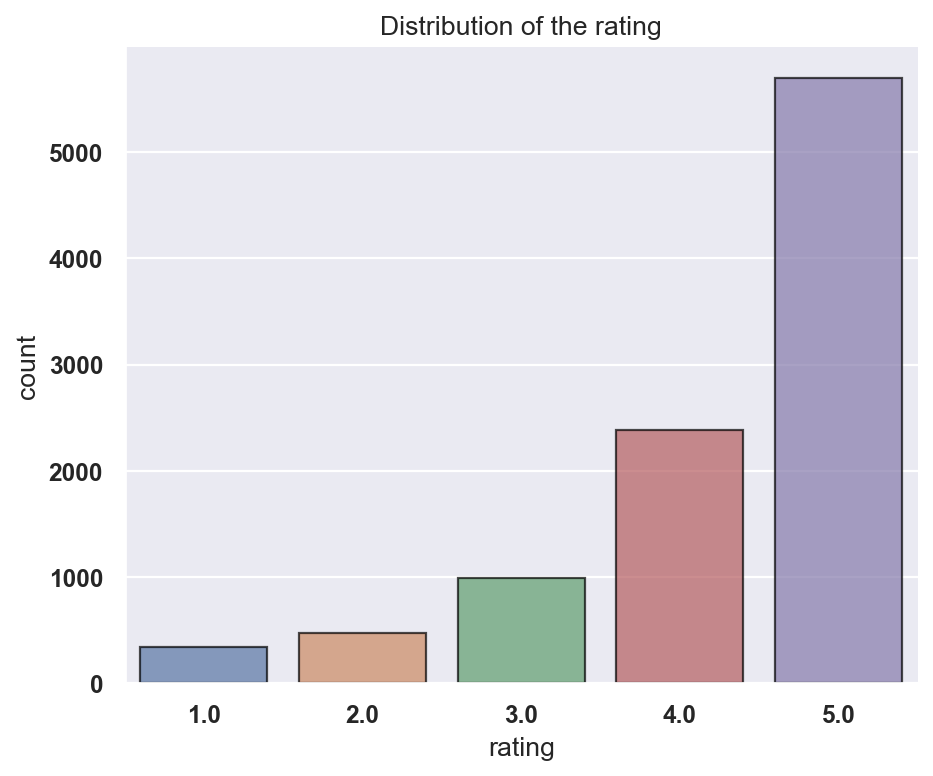

In [8]:
plt.figure(figsize=(6, 5), dpi=80)

sns.countplot(x='rating',alpha=0.7,edgecolor="black", data=df)
sns.despine()
plt.title("Distribution of the rating")

plt.tight_layout()
# plt.show()

plt.savefig('images/dist_rating.jpg', bbox_inches='tight')

In [9]:
df['rating'].describe()

count    9886.000000
mean        4.278070
std         1.048668
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

In [10]:
info = df.dropna()

In [11]:
info['author_info_original'] = info['author_info']
info['author_info'] = info['author_info'].str.lower()

/var/folders/4g/4qrhhk3j3kv_nf1xv032ysbw0000gn/T/ipykernel_24461/2429307452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info['author_info_original'] = info['author_info']
/var/folders/4g/4qrhhk3j3kv_nf1xv032ysbw0000gn/T/ipykernel_24461/2429307452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info['author_info'] = info['author_info'].str.lower()


In [12]:
info.loc[info['author_info'].str.contains(r'anonymous'), 'author_info']= 'anonymous'
info.loc[info['author_info'].str.contains(r'project manager'), 'author_info']= 'project manager'
info.loc[info['author_info'].str.contains(r'solution engineer'), 'author_info']= 'solution engineer'
info.loc[info['author_info'].str.contains(r'bdr|bd|business development'), 'author_info']= 'business development'
info.loc[info['author_info'].str.contains(r'systems engineer'), 'author_info']= 'systems engineer'
info.loc[info['author_info'].str.contains(r'customer success'), 'author_info']= 'customer success'
info.loc[info['author_info'].str.contains(r'software engineer'), 'author_info']= 'software engineer'
info.loc[info['author_info'].str.contains(r'finance'), 'author_info']= 'finance'
info.loc[info['author_info'].str.contains(r'recruitment|recruiter'), 'author_info']= 'recruiter'
info.loc[info['author_info'].str.contains(r'business analyst|analyst'), 'author_info']= 'business analyst'
info.loc[info['author_info'].str.contains(r'infrastructure'), 'author_info']= 'infrastructure'
info.loc[info['author_info'].str.contains(r'account director'), 'author_info']= 'account director'
info.loc[info['author_info'].str.contains(r'vice president'), 'author_info']= 'vice president'
info.loc[info['author_info'].str.contains(r'account executive'), 'author_info']= 'account executive'
info.loc[info['author_info'].str.contains(r'sales|sdr'), 'author_info']= 'sales'
info.loc[info['author_info'].str.contains(r'engineer'), 'author_info']= 'other engineer'
info.loc[info['author_info'].str.contains(r'systems specialist'), 'author_info']= 'systems specialist'
info.loc[info['author_info'].str.contains(r'business'), 'author_info']= 'business related'
info.loc[info['author_info'].str.contains(r'marketing'), 'author_info']= 'marketing'
info.loc[info['author_info'].str.contains(r'technical'), 'author_info']= 'technical stuff'
info.loc[info['author_info'].str.contains(r'other manager'), 'author_info']= 'other manager'

# info.loc[info['author_info'].str.contains(r''), 'author_info']= ''
# info.loc[info['author_info'].str.contains(r''), 'author_info']= ''
# info.loc[info['author_info'].str.contains(r''), 'author_info']= ''
# info.loc[info['author_info'].str.contains(r''), 'author_info']= ''
# info.loc[info['author_info'].str.contains(r''), 'author_info']= ''

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [13]:
info.loc[~info['author_info'].str.contains(
    r'anonymous|account executive|project manager|other manager|solution engineer|customer success|software engineer|finance|systems engineer|recruiter|business analyst|infrastructure|account director|vice president|business development|account executive|sales|other engineer|systems specialist|business related|marketing|technical stuff'), 'author_info']= 'others'

In [14]:
info['author_info'].value_counts()

others                1357
anonymous              874
account executive      732
other engineer         677
business related       435
sales                  397
technical stuff        275
marketing               90
vice president          81
customer success        74
recruiter               39
project manager         29
account director        25
systems specialist       9
finance                  9
infrastructure           6
Name: author_info, dtype: int64

In [15]:
sns.set(font_scale=1)

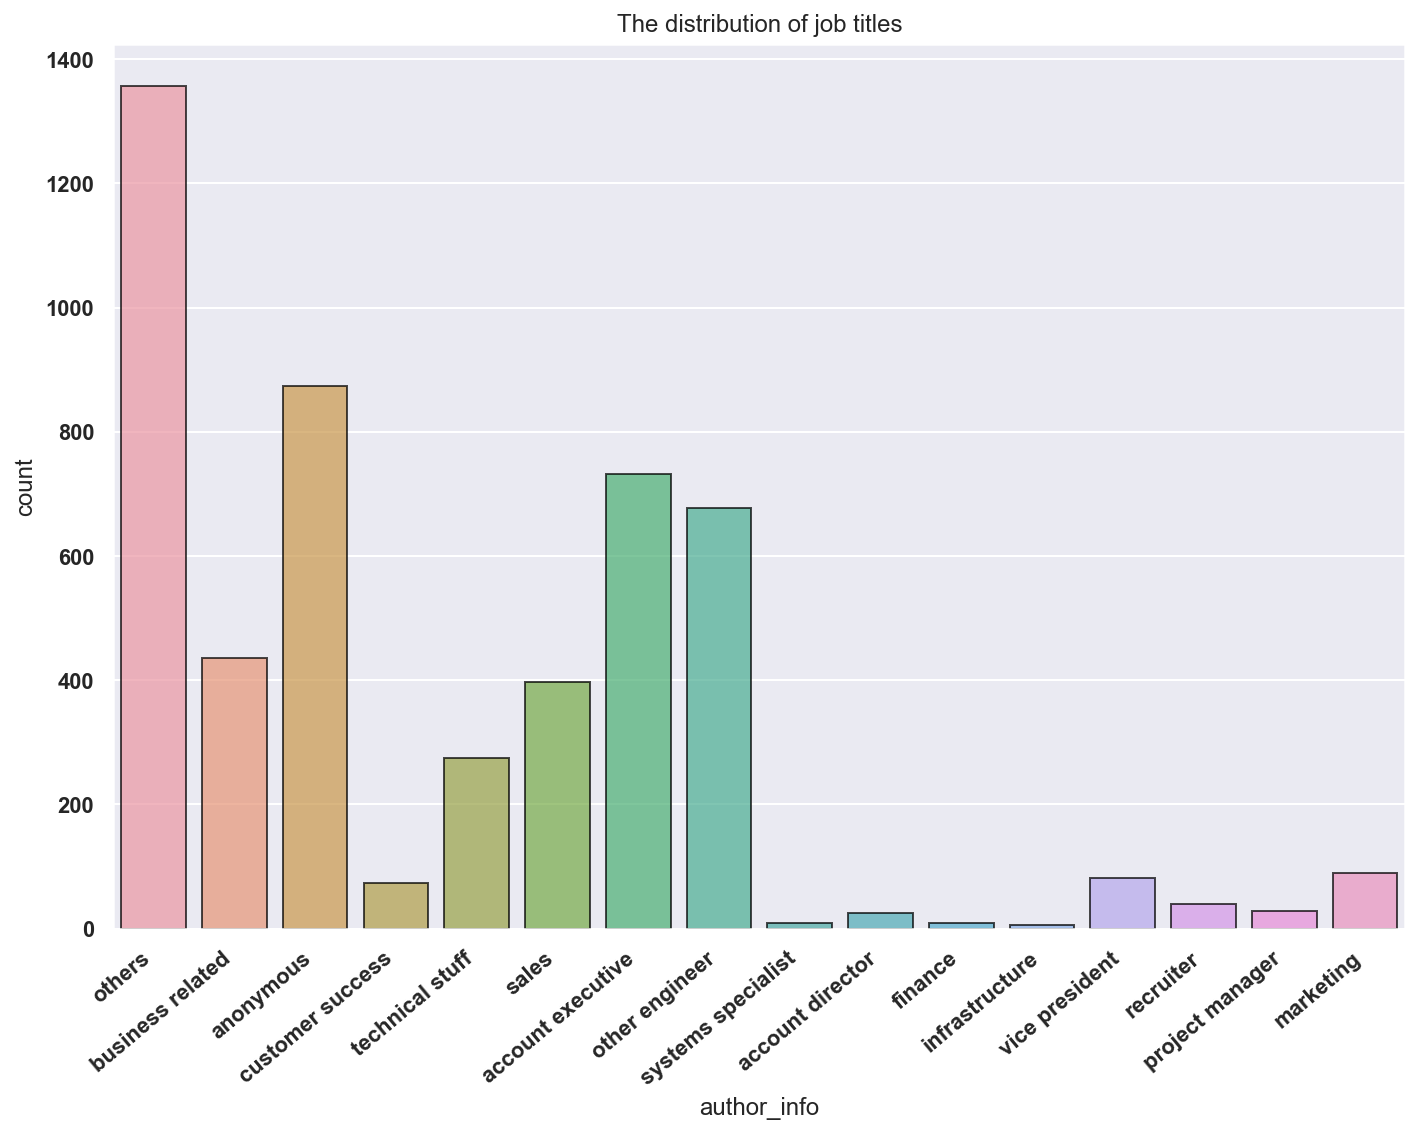

In [16]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='author_info',alpha=0.7,edgecolor="black", data=info)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# sns.despine()
plt.title('The distribution of job titles')


plt.tight_layout()
# plt.show()

plt.savefig('images/dist_positions.jpg', bbox_inches='tight')

In [17]:
info = info.loc[:, 'author_info': 'rating']

In [18]:
bins = [0, 3, 5]
names = ['low', 'high']
info['eval'] = pd.cut(info['rating'], bins, labels=names)
info.drop(columns = ['rating'], inplace = True)

In [19]:
df_dum = pd.get_dummies(info, prefix = ['r', 'eval'], columns = ['author_info', 'eval'])

In [20]:
df_dum.columns

Index(['r_account director', 'r_account executive', 'r_anonymous',
       'r_business related', 'r_customer success', 'r_finance',
       'r_infrastructure', 'r_marketing', 'r_other engineer', 'r_others',
       'r_project manager', 'r_recruiter', 'r_sales', 'r_systems specialist',
       'r_technical stuff', 'r_vice president', 'eval_low', 'eval_high'],
      dtype='object')

In [21]:
mask = np.zeros_like(df_dum.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

/var/folders/4g/4qrhhk3j3kv_nf1xv032ysbw0000gn/T/ipykernel_24461/3957212441.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_dum.corr(), dtype=np.bool)


In [22]:
sns.set(font_scale=2)

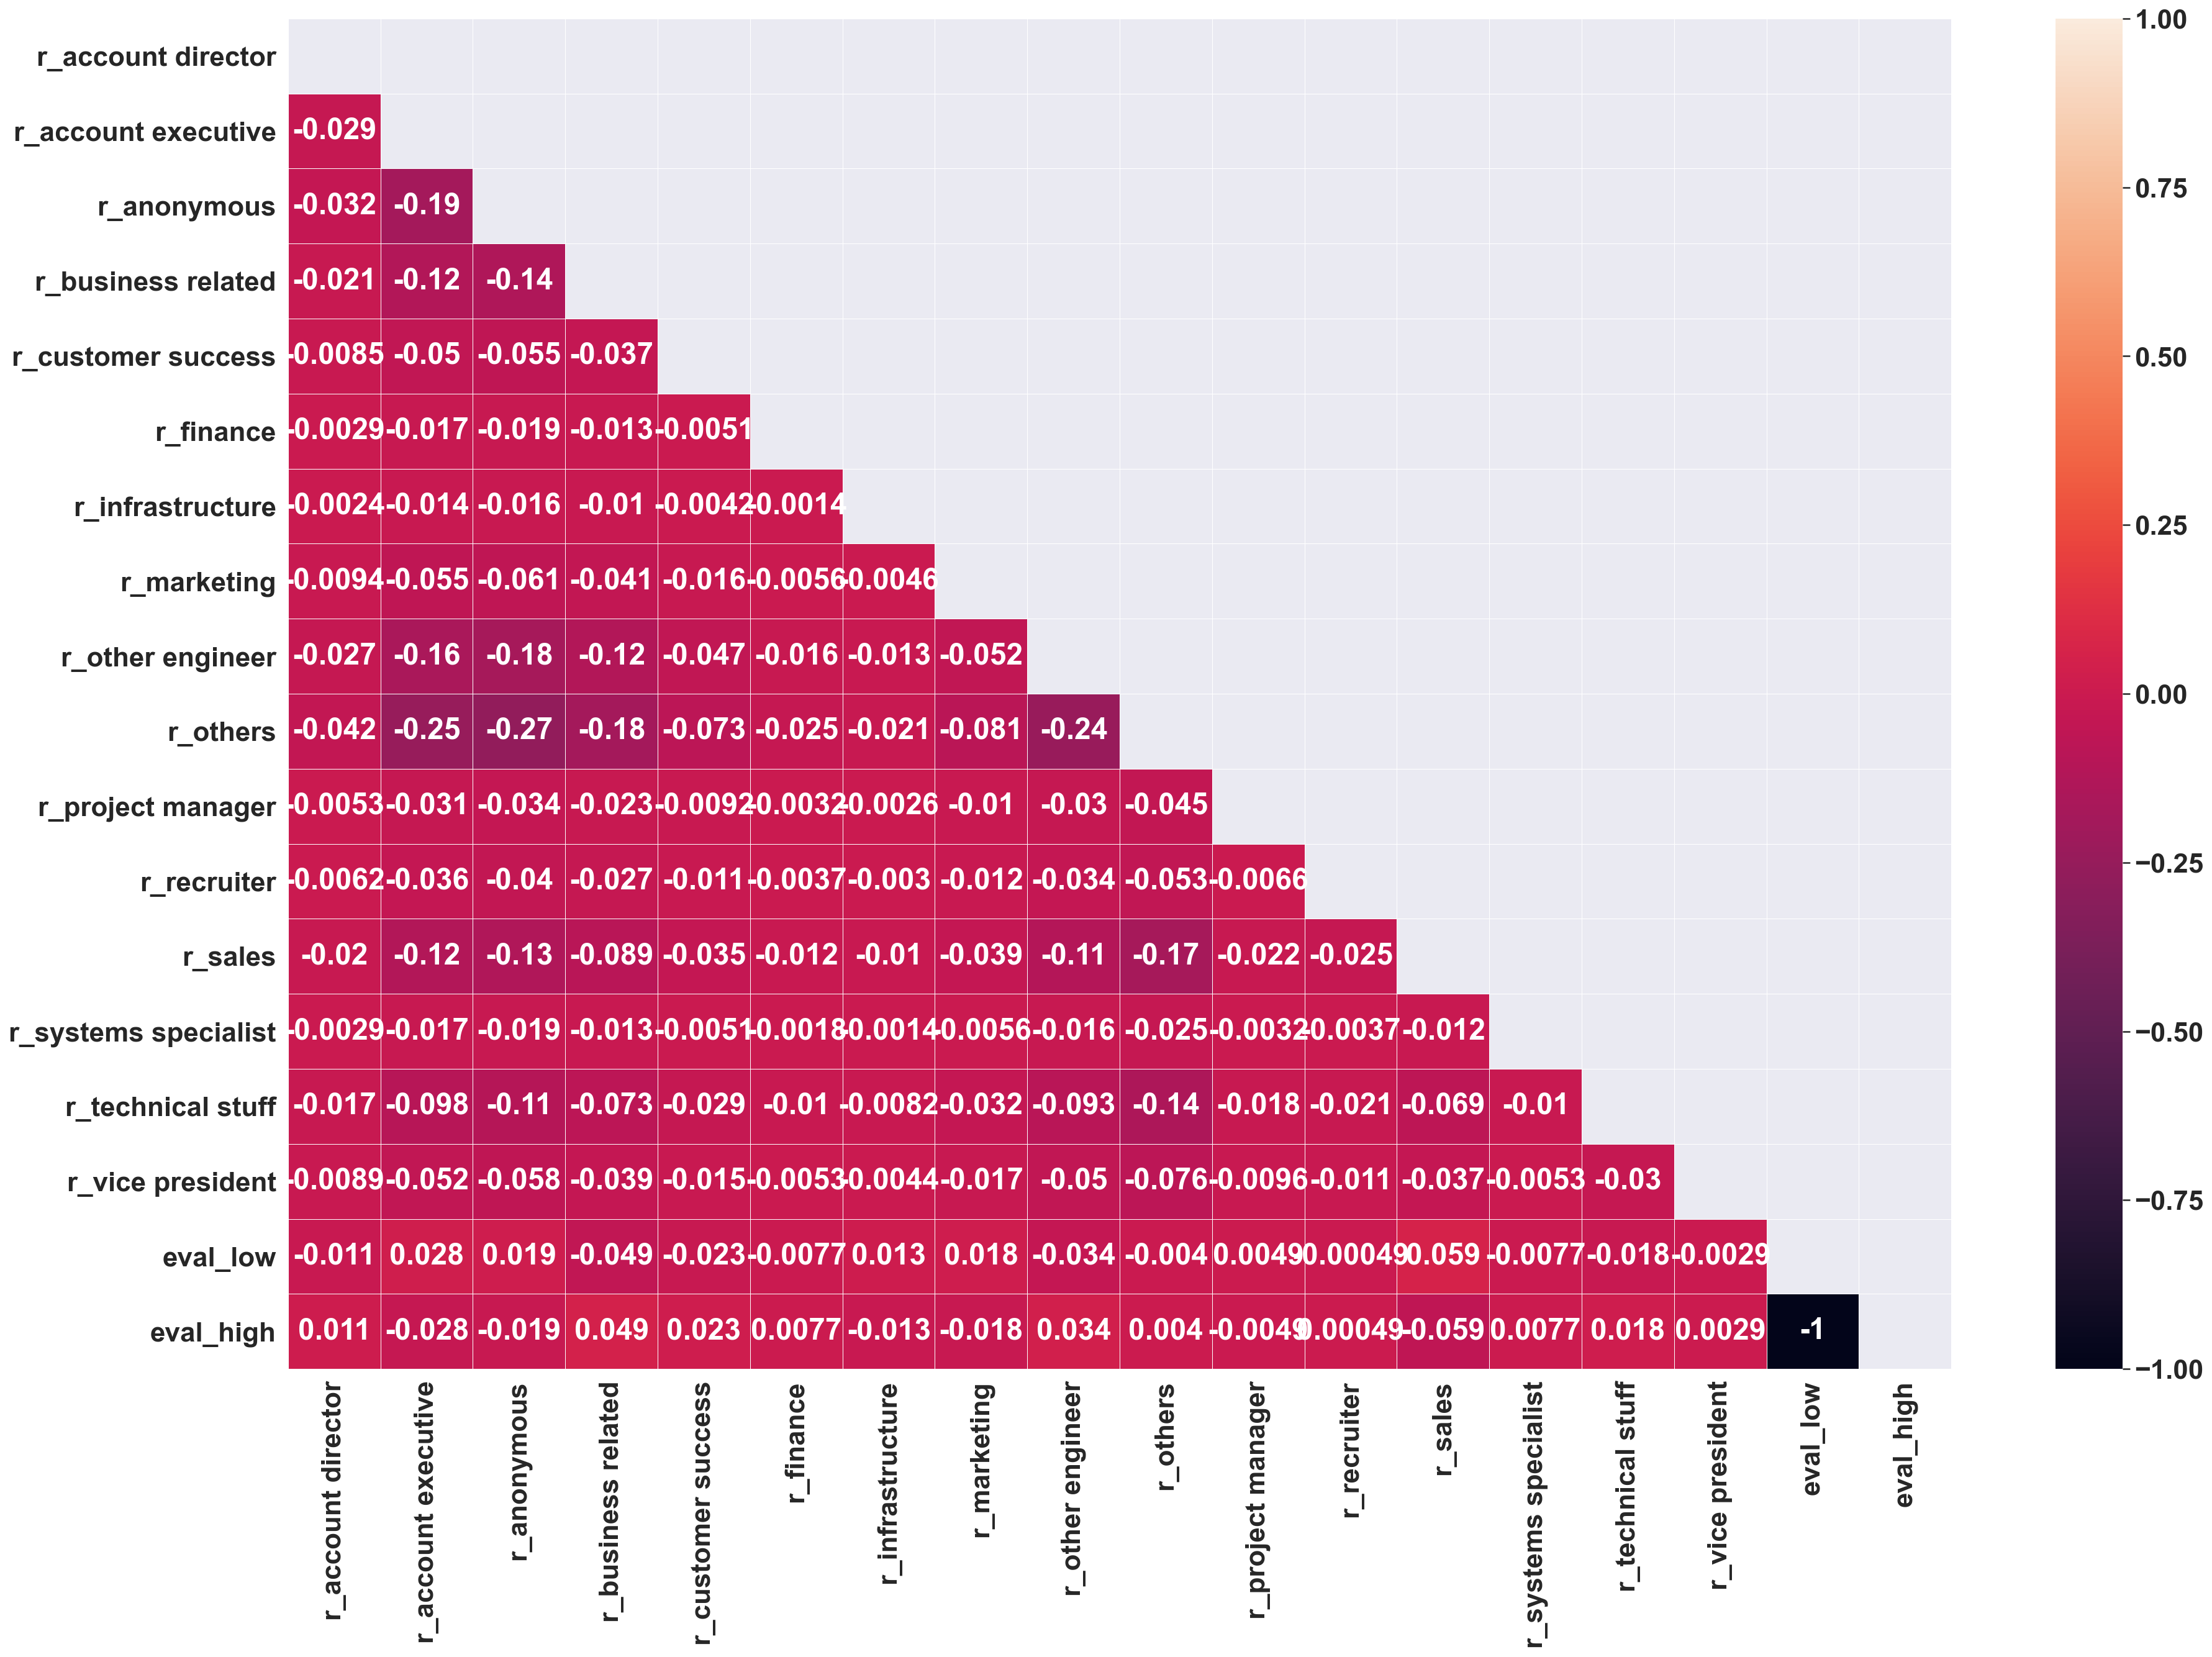

In [23]:
plt.figure(figsize = (30,20))

sns.heatmap(df_dum.corr(), 
            mask = mask,
            annot=True, 
#             cmap = 'RdPu_r',
#             cmap = 'cool_r',
            vmax=1,
            vmin=-1,
            linewidths=.5,
            robust=True)

plt.savefig('images/heatmap_positions.jpg', bbox_inches='tight')

In [24]:
corr_matrix = df_dum.corr()
d_top = corr_matrix['eval_high'].sort_values(ascending=False)
print('Top Correlations are: \n', d_top.head(10))

Top Correlations are: 
 eval_high               1.000000
r_business related      0.049138
r_other engineer        0.034395
r_customer success      0.023121
r_technical stuff       0.017887
r_account director      0.011211
r_systems specialist    0.007685
r_finance               0.007685
r_others                0.004007
r_vice president        0.002897
Name: eval_high, dtype: float64


In [25]:
corr_matrix = df_dum.corr()
d_top = corr_matrix['eval_high'].sort_values(ascending=False)
print('Bottom Correlations are: \n', d_top.tail(10))

Bottom Correlations are: 
 r_others               0.004007
r_vice president       0.002897
r_recruiter            0.000490
r_project manager     -0.004949
r_infrastructure      -0.013491
r_marketing           -0.017954
r_anonymous           -0.019206
r_account executive   -0.027589
r_sales               -0.058577
eval_low              -1.000000
Name: eval_high, dtype: float64
